In [2]:
# Import libraries
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

Dimensions of BMX are:
(14300, 22)


Text(0, 0.5, 'Height (cm)')

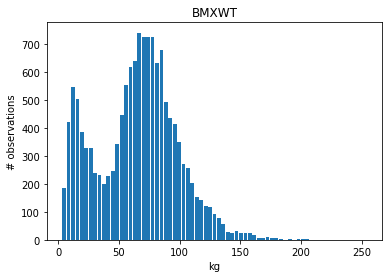

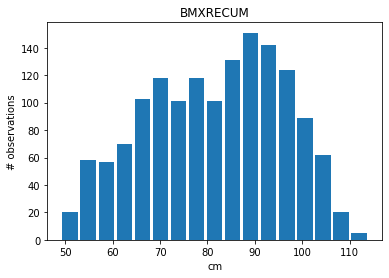

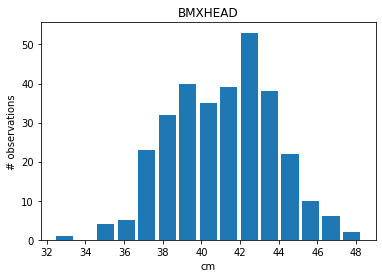

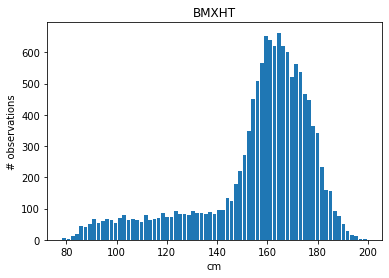

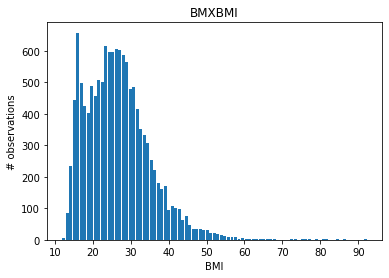

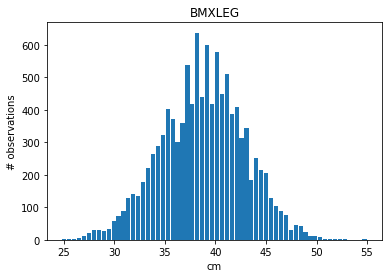

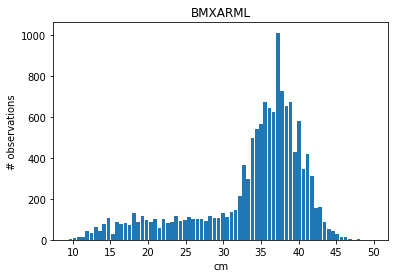

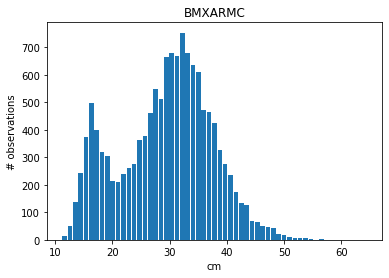

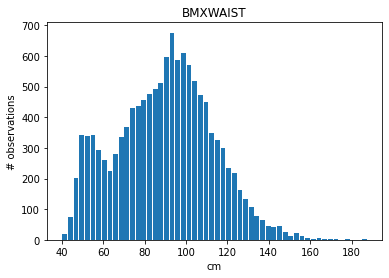

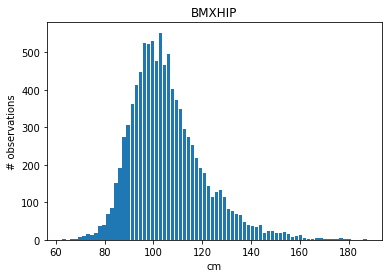

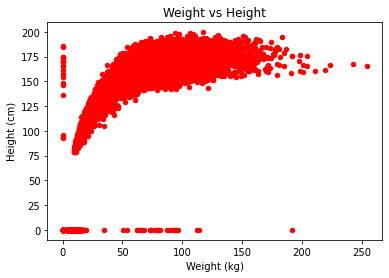

In [21]:
# Load BMX: Body Measurements from raw github

url = "https://raw.githubusercontent.com/NeuroDataDesign/ProgLearn_2021-2022/main/Tiffany_Chu/NHANES_Data/CSV/bmx.csv"
bmx = pd.read_csv(url, sep=",", error_bad_lines=False)

# print(dimensions of bmx)
print("Dimensions of BMX are:")
print(bmx.shape)

#Extract meaningful numerical data
r = re.compile("BMX.*")
bmx_cols = filter(r.match, bmx.columns)

#create histograms
for i in bmx_cols:
  plt.figure()
  plt.hist(bmx[i][bmx[i] > 0], bins="auto", rwidth=0.85)
  plt.title(i)
  plt.ylabel("# observations")
  if i == "BMXWT": plt.xlabel("kg")
  elif i == "BMXBMI": plt.xlabel ("BMI")
  else: plt.xlabel ("cm")

# Plot weight vs height
# BMXWT - Weight (kg)
# BMXHT - Standing Height (cm)

bmx.plot.scatter(x="BMXWT", y="BMXHT", c="red")
plt.title("Weight vs Height")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

Dimensions of demographics information are:
(15560, 29)
[1990, 1544, 5271, 4098, 0, 1638, 1019]


([<matplotlib.axis.XTick at 0x7f7912a6ced0>,
 [Text(0, 0, 'Mexican American'),
  Text(0, 0, 'Other Hispanic'),
  Text(0, 0, 'Non-Hispanic White'),
  Text(0, 0, 'Non-Hispanic Black'),
  Text(0, 0, ''),
  Text(0, 0, 'Non-Hispanic Asian'),
  Text(0, 0, 'Other/Multi')])

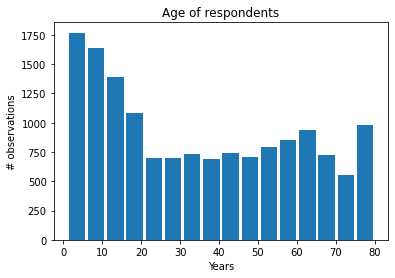

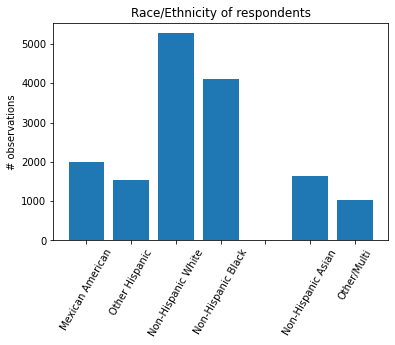

In [34]:
# Load DEMOG: NHANES Demographics from raw github

url = "https://raw.githubusercontent.com/NeuroDataDesign/ProgLearn_2021-2022/main/Tiffany_Chu/NHANES_Data/CSV/demog.csv"
demog = pd.read_csv(url, sep=",", error_bad_lines=False)

# print(size of demog)

print("Dimensions of demographics information are:")
print(demog.shape)

# Plot age as histogram
# RIDAGEYR - Age in years at screening 

plt.figure()
plt.hist(demog["RIDAGEYR"][demog["RIDAGEYR"] > 0], bins=16, rwidth=0.85)
plt.title("Age of respondents")
plt.ylabel("# observations")
plt.xlabel("Years")

# Plot race as bar chart
# RIDRETH3 - Race/Hispanic origin w/ NH Asian

fig = plt.figure()
ethn = ["Mexican American", "Other Hispanic", "Non-Hispanic White", 
        "Non-Hispanic Black", None, "Non-Hispanic Asian", "Other/Multi"]

demog_ethn = [len(demog["RIDRETH3"][demog["RIDRETH3"]==i]) for i in range(1, 8)]
print(demog_ethn)
y_pos = np.arange(len(ethn))
plt.bar(y_pos, demog_ethn)
plt.title("Race/Ethnicity of respondents")
plt.ylabel("# observations")
plt.xticks(y_pos, ethn, rotation=60)